In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import warnings

sys.path.append('../src/')
warnings.filterwarnings("ignore")

from server import Server
from utils import plot_exp

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100

### First experiment : impact of federated learning

In [ ]:
LR = 0.01
EPOCHS = 1
NR_TRAINING_ROUNDS = 30
BATCH_SIZE = 128

RANGE_NR_CLIENTS = [1,5,10]

In [ ]:
experiment_losses, experiment_accs = [], []
for nr_clients in RANGE_NR_CLIENTS:
    print(f"### Number of clients : {nr_clients} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='MNIST',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=False,
        epsilon=None,
        max_grad_norm=None,
        noise_multiplier=None,
        is_parallel=True,
        device=None,
        verbose='all')

    test_losses, test_accs = server.train()
    
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

In [7]:
names = [f'{i} clients' for i in RANGE_NR_CLIENTS]
title = 'First experiment : MNIST database'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
fig.savefig("MNIST_exp1.png")

NameError: name 'RANGE_NR_CLIENTS' is not defined

### Second experiment : impact of differential privacy

In [3]:
NR_CLIENTS = 10
NR_TRAINING_ROUNDS = 30
EPOCHS = 1
LR = 0.01
BATCH_SIZE = 128

MAX_GRAD_NORM = 1.2
NOISE_MULTIPLIER = None

RANGE_EPSILON = [10,50,100]

In [4]:
experiment_losses, experiment_accs = [], []
for epsilon in RANGE_EPSILON:
    print(f"### ε : {epsilon} ###\n\n")
    server = Server(
        nr_clients=NR_CLIENTS,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='MNIST',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=True,
        epsilon=epsilon,
        max_grad_norm=MAX_GRAD_NORM,
        noise_multiplier=NOISE_MULTIPLIER,
        is_parallel=True,
        device=None,
        verbose='all')

    test_losses, test_accs = server.train()
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### ε : 10 ###


--- Configuration ---
nr_clients: 10
nr_training_rounds: 30
data: MNIST
epochs: 1
lr: 0.01
batch_size: 128
is_private: True
epsilon: 10
max_grad_norm: 1.2
noise_multiplier: None
is_parallel: True
device: <class 'torch.device'>
verbose: all
[Client 0]	Using sigma=2.4013818359375003 and C=1.2
[Client 1]	Using sigma=2.4013818359375003 and C=1.2
[Client 2]	Using sigma=2.4013818359375003 and C=1.2
[Client 3]	Using sigma=2.4013818359375003 and C=1.2
[Client 4]	Using sigma=2.4013818359375003 and C=1.2
[Client 5]	Using sigma=2.4013818359375003 and C=1.2
[Client 6]	Using sigma=2.4013818359375003 and C=1.2
[Client 7]	Using sigma=2.4013818359375003 and C=1.2
[Client 8]	Using sigma=2.4013818359375003 and C=1.2
[Client 9]	Using sigma=2.4013818359375003 and C=1.2
--- Training ---
[Client 9]	Train Epoch: 0	Loss: 2.2764
	(ε = 0.33, δ = 8.333333333333333e-05) for α = 43.0
Client 9 - done
[Client 4]	Train Epoch: 0	Loss: 2.2951
	(ε = 0.33, δ = 8.333333333333333e-05) for α = 43.0
Client 4

[Client 8]	Train Epoch: 0	Loss: 2.1234
	(ε = 0.78, δ = 8.333333333333333e-05) for α = 24.0
Client 8 - done
[Client 2]	Train Epoch: 0	Loss: 2.0997
	(ε = 0.78, δ = 8.333333333333333e-05) for α = 24.0
Client 2 - done
[Client 7]	Train Epoch: 0	Loss: 2.1221
	(ε = 0.78, δ = 8.333333333333333e-05) for α = 24.0
Client 7 - done
Round 7, test_loss: 164.893, test_acc: 0.503
[Client 1]	Train Epoch: 0	Loss: 2.1192
	(ε = 0.84, δ = 8.333333333333333e-05) for α = 23.0
Client 1 - done
[Client 6]	Train Epoch: 0	Loss: 2.0886
	(ε = 0.84, δ = 8.333333333333333e-05) for α = 23.0
Client 6 - done
[Client 8]	Train Epoch: 0	Loss: 2.0796
	(ε = 0.84, δ = 8.333333333333333e-05) for α = 23.0
Client 8 - done
[Client 9]	Train Epoch: 0	Loss: 2.1062
	(ε = 0.84, δ = 8.333333333333333e-05) for α = 23.0
Client 9 - done
[Client 2]	Train Epoch: 0	Loss: 2.0370
	(ε = 0.84, δ = 8.333333333333333e-05) for α = 23.0
Client 2 - done
[Client 5]	Train Epoch: 0	Loss: 2.0500
[Client 3]	Train Epoch: 0	Loss: 2.0556
	(ε = 0.84, δ = 8.333

[Client 4]	Train Epoch: 0	Loss: 1.6936[Client 8]	Train Epoch: 0	Loss: 1.6459

	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 4 - done
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 8 - done
[Client 9]	Train Epoch: 0	Loss: 1.8650
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 9 - done
[Client 3]	Train Epoch: 0	Loss: 1.7272
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 3 - done
[Client 7]	Train Epoch: 0	Loss: 1.7783
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 7 - done
[Client 6]	Train Epoch: 0	Loss: 1.6833
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 6 - done
[Client 1]	Train Epoch: 0	Loss: 1.7369
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 1 - done
[Client 2]	Train Epoch: 0	Loss: 1.6600
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 2 - done
[Client 0]	Train Epoch: 0	Loss: 1.6772
	(ε = 1.14, δ = 8.333333333333333e-05) for α = 17.0
Client 0 - done
Round 15, test_loss: 127.889, test_ac

[Client 6]	Train Epoch: 0	Loss: 1.3777
	(ε = 1.38, δ = 8.333333333333333e-05) for α = 15.0
Client 6 - done
[Client 9]	Train Epoch: 0	Loss: 1.2107
	(ε = 1.38, δ = 8.333333333333333e-05) for α = 15.0
Client 9 - done
[Client 3]	Train Epoch: 0	Loss: 1.2829
	(ε = 1.38, δ = 8.333333333333333e-05) for α = 15.0
Client 3 - done
[Client 2]	Train Epoch: 0	Loss: 1.3191
	(ε = 1.38, δ = 8.333333333333333e-05) for α = 15.0
Client 2 - done
[Client 7]	Train Epoch: 0	Loss: 1.3533
	(ε = 1.38, δ = 8.333333333333333e-05) for α = 15.0
Client 7 - done
Round 22, test_loss: 92.054, test_acc: 0.705
[Client 0]	Train Epoch: 0	Loss: 1.2737
	(ε = 1.41, δ = 8.333333333333333e-05) for α = 14.0
Client 0 - done
[Client 5]	Train Epoch: 0	Loss: 1.2710
	(ε = 1.41, δ = 8.333333333333333e-05) for α = 14.0
[Client 8]	Train Epoch: 0	Loss: 1.3142
Client 5 - done
	(ε = 1.41, δ = 8.333333333333333e-05) for α = 14.0
Client 8 - done
[Client 3]	Train Epoch: 0	Loss: 1.3768
	(ε = 1.41, δ = 8.333333333333333e-05) for α = 14.0
Client 3

[Client 6]	Train Epoch: 0	Loss: 1.1908
	(ε = 1.58, δ = 8.333333333333333e-05) for α = 13.0
Client 6 - done
Round 29, test_loss: 69.254, test_acc: 0.734
[Client 9]	Train Epoch: 0	Loss: 1.0597
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 9 - done
[Client 4]	Train Epoch: 0	Loss: 1.0439
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 4 - done
[Client 8]	Train Epoch: 0	Loss: 1.1496
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 8 - done
[Client 7]	Train Epoch: 0	Loss: 1.0720
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 7 - done
[Client 2]	Train Epoch: 0	Loss: 1.0546
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 2 - done
[Client 0]	Train Epoch: 0	Loss: 1.2562
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 0 - done
[Client 5]	Train Epoch: 0	Loss: 1.1276
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 5 - done
[Client 3]	Train Epoch: 0	Loss: 1.0670
	(ε = 1.61, δ = 8.333333333333333e-05) for α = 13.0
Client 3

[Client 9]	Train Epoch: 0	Loss: 2.0984
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 9 - done
[Client 1]	Train Epoch: 0	Loss: 2.1207
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7[Client 4]	Train Epoch: 0	Loss: 2.0929
Client 1 - done

	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 4 - done
[Client 8]	Train Epoch: 0	Loss: 2.0971
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 8 - done
[Client 2]	Train Epoch: 0	Loss: 2.0730
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 2 - done
[Client 3]	Train Epoch: 0	Loss: 2.0809
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 3 - done
[Client 7]	Train Epoch: 0	Loss: 2.1063
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 7 - done
[Client 0]	Train Epoch: 0	Loss: 2.1098
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 0 - done
[Client 6]	Train Epoch: 0	Loss: 2.1345
	(ε = 2.59, δ = 8.333333333333333e-05) for α = 6.7
Client 6 - done
Round 6, test_loss: 163.845, test_acc: 0.636
[

[Client 8]	Train Epoch: 0	Loss: 1.6893
	(ε = 3.53, δ = 8.333333333333333e-05) for α = 5.7
Client 8 - done
[Client 7]	Train Epoch: 0	Loss: 1.7080
	(ε = 3.53, δ = 8.333333333333333e-05) for α = 5.7
Client 7 - done
[Client 2]	Train Epoch: 0	Loss: 1.7091
	(ε = 3.53, δ = 8.333333333333333e-05) for α = 5.7
Client 2 - done
[Client 4]	Train Epoch: 0	Loss: 1.6236
	(ε = 3.53, δ = 8.333333333333333e-05) for α = 5.7
Client 4 - done
Round 13, test_loss: 127.899, test_acc: 0.710
[Client 2]	Train Epoch: 0	Loss: 1.5725
	(ε = 3.65, δ = 8.333333333333333e-05) for α = 5.6
Client 2 - done
[Client 6]	Train Epoch: 0	Loss: 1.6298
	(ε = 3.65, δ = 8.333333333333333e-05) for α = 5.6
Client 6 - done
[Client 0]	Train Epoch: 0	Loss: 1.6158
	(ε = 3.65, δ = 8.333333333333333e-05) for α = 5.6
Client 0 - done
[Client 5]	Train Epoch: 0	Loss: 1.6677
	(ε = 3.65, δ = 8.333333333333333e-05) for α = 5.6
Client 5 - done
[Client 4]	Train Epoch: 0	Loss: 1.6316
	(ε = 3.65, δ = 8.333333333333333e-05) for α = 5.6
Client 4 - done


[Client 5]	Train Epoch: 0	Loss: 1.1455
[Client 3]	Train Epoch: 0	Loss: 1.1515
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 5 - done
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 3 - done
[Client 7]	Train Epoch: 0	Loss: 1.1200
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 7 - done
[Client 1]	Train Epoch: 0	Loss: 1.2227
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 1 - done
[Client 4]	Train Epoch: 0	Loss: 1.2941
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 4 - done
[Client 6]	Train Epoch: 0	Loss: 1.2336
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 6 - done
[Client 2]	Train Epoch: 0	Loss: 1.2058
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 2 - done
[Client 0]	Train Epoch: 0	Loss: 1.3137
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 0 - done
[Client 9]	Train Epoch: 0	Loss: 1.2273
	(ε = 4.40, δ = 8.333333333333333e-05) for α = 5.1
Client 9 - done
[Client 8]	Train Epoch: 0	Loss: 1.1853
	(ε = 4

	(ε = 5.06, δ = 8.333333333333333e-05) for α = 4.7
Client 0 - done
[Client 6]	Train Epoch: 0	Loss: 1.0432
	(ε = 5.06, δ = 8.333333333333333e-05) for α = 4.7
Client 6 - done
[Client 3]	Train Epoch: 0	Loss: 1.0761
	(ε = 5.06, δ = 8.333333333333333e-05) for α = 4.7
Client 3 - done
[Client 5]	Train Epoch: 0	Loss: 0.9851
	(ε = 5.06, δ = 8.333333333333333e-05) for α = 4.7
Client 5 - done
[Client 1]	Train Epoch: 0	Loss: 1.0663
	(ε = 5.06, δ = 8.333333333333333e-05) for α = 4.7
Client 1 - done
[Client 2]	Train Epoch: 0	Loss: 1.1337
	(ε = 5.06, δ = 8.333333333333333e-05) for α = 4.7
Client 2 - done
Round 28, test_loss: 63.733, test_acc: 0.750
[Client 5]	Train Epoch: 0	Loss: 0.9759
	(ε = 5.14, δ = 8.333333333333333e-05) for α = 4.6
Client 5 - done
[Client 0]	Train Epoch: 0	Loss: 1.1239
[Client 1]	Train Epoch: 0	Loss: 0.9637
	(ε = 5.14, δ = 8.333333333333333e-05) for α = 4.6
Client 0 - done
	(ε = 5.14, δ = 8.333333333333333e-05) for α = 4.6
Client 1 - done
[Client 8]	Train Epoch: 0	Loss: 1.0491
	

	(ε = 4.65, δ = 8.333333333333333e-05) for α = 3.8
Client 0 - done
[Client 1]	Train Epoch: 0	Loss: 2.1660
	(ε = 4.65, δ = 8.333333333333333e-05) for α = 3.8
Client 1 - done
[Client 3]	Train Epoch: 0	Loss: 2.1974
	(ε = 4.65, δ = 8.333333333333333e-05) for α = 3.8
Client 3 - done
[Client 7]	Train Epoch: 0	Loss: 2.1535
	(ε = 4.65, δ = 8.333333333333333e-05) for α = 3.8
Client 7 - done
Round 4, test_loss: 169.762, test_acc: 0.535
[Client 7]	Train Epoch: 0	Loss: 2.1314
	(ε = 4.97, δ = 8.333333333333333e-05) for α = 3.7
Client 7 - done
[Client 0]	Train Epoch: 0	Loss: 2.0857
	(ε = 4.97, δ = 8.333333333333333e-05) for α = 3.7
Client 0 - done
[Client 8]	Train Epoch: 0	Loss: 2.1012
	(ε = 4.97, δ = 8.333333333333333e-05) for α = 3.7
Client 8 - done
[Client 4]	Train Epoch: 0	Loss: 2.1023[Client 1]	Train Epoch: 0	Loss: 2.1476

[Client 6]	Train Epoch: 0	Loss: 2.1313
	(ε = 4.97, δ = 8.333333333333333e-05) for α = 3.7
Client 4 - done
	(ε = 4.97, δ = 8.333333333333333e-05) for α = 3.7
Client 1 - done
	

[Client 1]	Train Epoch: 0	Loss: 1.6643
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 1 - done
[Client 4]	Train Epoch: 0	Loss: 1.6905
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 4 - done
[Client 3]	Train Epoch: 0	Loss: 1.7054
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 3 - done
[Client 8]	Train Epoch: 0	Loss: 1.7273
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 8 - done
[Client 5]	Train Epoch: 0	Loss: 1.6972
[Client 2]	Train Epoch: 0	Loss: 1.6942
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 2 - done

Client 5 - done
[Client 9]	Train Epoch: 0	Loss: 1.6752
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 9 - done
[Client 0]	Train Epoch: 0	Loss: 1.6489
[Client 7]	Train Epoch: 0	Loss: 1.7477
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 0 - done
	(ε = 6.76, δ = 8.333333333333333e-05) for α = 3.3
Client 7 - done
Round 12, test_loss: 128.434, test_acc: 0.686


[Client 5]	Train Epoch: 0	Loss: 1.2325
	(ε = 8.19, δ = 8.333333333333333e-05) for α = 3.0
Client 5 - done
[Client 4]	Train Epoch: 0	Loss: 1.2926
[Client 9]	Train Epoch: 0	Loss: 1.3782
	(ε = 8.19, δ = 8.333333333333333e-05) for α = 3.0
Client 4 - done[Client 1]	Train Epoch: 0	Loss: 1.2755

	(ε = 8.19, δ = 8.333333333333333e-05) for α = 3.0
Client 9 - done
	(ε = 8.19, δ = 8.333333333333333e-05) for α = 3.0
Client 1 - done
Round 19, test_loss: 90.152, test_acc: 0.718
[Client 8]	Train Epoch: 0	Loss: 1.1359
	(ε = 8.38, δ = 8.333333333333333e-05) for α = 3.0
Client 8 - done
[Client 1]	Train Epoch: 0	Loss: 1.3873
	(ε = 8.38, δ = 8.333333333333333e-05) for α = 3.0
Client 1 - done
[Client 0]	Train Epoch: 0	Loss: 1.3120
	(ε = 8.38, δ = 8.333333333333333e-05) for α = 3.0
Client 0 - done
[Client 6]	Train Epoch: 0	Loss: 1.3670
	(ε = 8.38, δ = 8.333333333333333e-05) for α = 3.0
Client 6 - done
[Client 9]	Train Epoch: 0	Loss: 1.3923
	(ε = 8.38, δ = 8.333333333333333e-05) for α = 3.0
Client 9 - done
[

[Client 4]	Train Epoch: 0	Loss: 1.0550
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 4 - done
[Client 2]	Train Epoch: 0	Loss: 0.8917
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 2 - done
[Client 8]	Train Epoch: 0	Loss: 1.1400
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 8 - done
[Client 0]	Train Epoch: 0	Loss: 0.9564
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 0 - done
[Client 7]	Train Epoch: 0	Loss: 1.1479
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 7 - done
[Client 5]	Train Epoch: 0	Loss: 0.9917
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 5 - done
[Client 6]	Train Epoch: 0	Loss: 1.1081
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 6 - done
[Client 1]	Train Epoch: 0	Loss: 0.9317
[Client 3]	Train Epoch: 0	Loss: 0.9792
	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8	(ε = 9.61, δ = 8.333333333333333e-05) for α = 2.8
Client 1 - done

Client 3 - done
[Client 9]	Train Epoch: 0	Loss: 1.0167
	(ε = 9

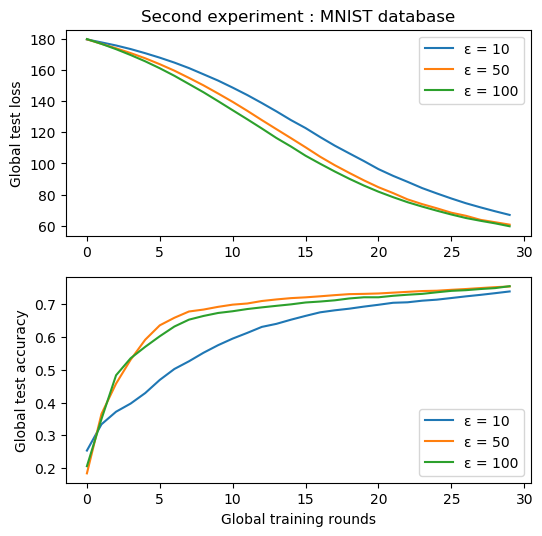

In [6]:
names = [f'ε = {i}' for i in RANGE_EPSILON]
title = 'Second experiment : MNIST database'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
plt.savefig('MNIST_exp2.pdf')